In [3]:
import cv2
import os
import uuid
import time

IMAGES_PATH = os.path.join('data', 'images')  # Local storage
os.makedirs(IMAGES_PATH, exist_ok=True)

cap = cv2.VideoCapture(0)  # Uses your PC's webcam

for imgnum in range(30):
    print(f'Collecting image {imgnum}')
    ret, frame = cap.read()

    if not ret:
        print("⚠️ Camera failed to capture an image")
        break

    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    
    cv2.imshow('Frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [4]:
!pip install labelme

In [5]:
!labelme

^C


In [ ]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

In [1]:
!pip install tensorflow 

In [3]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\rocke\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\rocke\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\rocke\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\rocke\anaconda3\Lib\site-packages\setuptools\_v

In [9]:
import numpy as np

In [8]:
import cv2
import os
import uuid
import time

In [5]:
import os

In [6]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [7]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [10]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [11]:
tf.config.list_physical_devices('GPU')

[]

In [12]:
images = tf.data.Dataset.list_files('C:\\Users\\rocke\data\\images\\*.jpg')


In [13]:
images.as_numpy_iterator().next()

b'C:\\Users\\rocke\\data\\images\\a1fe39ca-df88-11ef-9a69-1413338f79c4.jpg'

In [14]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [16]:
images = images.map(load_image)


TypeError: in user code:

    File "C:\Users\rocke\AppData\Local\Temp\ipykernel_5300\2470288393.py", line 2, in load_image  *
        byte_img = tf.io.read_file(x)

    TypeError: Input 'filename' of 'ReadFile' Op has type uint8 that does not match expected type of string.


In [17]:
images.as_numpy_iterator().next()

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 253],
        ...,
        [148, 134, 123],
        [150, 136, 123],
        [148, 134, 121]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [148, 134, 123],
        [151, 137, 124],
        [154, 140, 127]],

       [[254, 254, 252],
        [252, 252, 252],
        [253, 253, 255],
        ...,
        [144, 130, 119],
        [147, 135, 121],
        [156, 144, 130]],

       ...,

       [[255, 255, 255],
        [254, 255, 255],
        [252, 255, 255],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 24,  24,  24]],

       [[255, 254, 255],
        [255, 255, 255],
        [254, 255, 255],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 24,  24,  24]],

       [[255, 253, 255],
        [255, 254, 255],
        [254, 255, 255],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 23,  23,  23]]

In [18]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [19]:
image_generator = images.batch(4).as_numpy_iterator()

In [24]:
plot_images = image_generator.next()

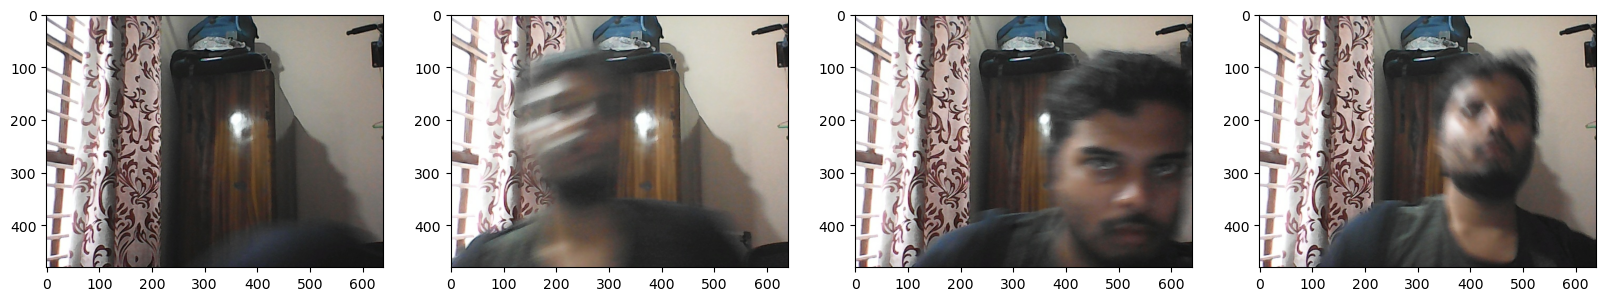

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [ ]:
30*.7 # 63 to train


In [26]:
30*.15 # 14 and 13 to test and val

4.5

In [28]:
for folder in ['train','test','validate']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath) 

In [29]:
import albumentations as alb


C:\Users\rocke\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [30]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [39]:
img = cv2.imread(os.path.join('data','train', 'images','9d57a0e3-df88-11ef-ae06-1413338f79c4.jpg'))

In [40]:
with open(os.path.join('data', 'train', 'labels', '9d57a0e3-df88-11ef-ae06-1413338f79c4.json'), 'r') as f:
    

In [43]:
label['shapes']

[{'label': 'face',
  'points': [[144.16666666666669, 112.77777777777777],
   [376.38888888888886, 432.22222222222223]],
  'group_id': None,
  'description': '',
  'shape_type': 'rectangle',
  'flags': {},
  'mask': None}]

In [44]:
label['shapes'][0]['points']


[[144.16666666666669, 112.77777777777777],
 [376.38888888888886, 432.22222222222223]]

In [45]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [46]:
coords

[144.16666666666669,
 112.77777777777777,
 376.38888888888886,
 432.22222222222223]

In [47]:
coords = list(np.divide(coords, [640,480,640,480]))


In [48]:
coords


[0.22526041666666669,
 0.2349537037037037,
 0.5881076388888888,
 0.900462962962963]

In [49]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [50]:
augmented['bboxes'][0][2:]

(1.0, 0.7538271604938271)

In [51]:
augmented['bboxes']


[(0.570246913580247, 0.043950617283950555, 1.0, 0.7538271604938271)]

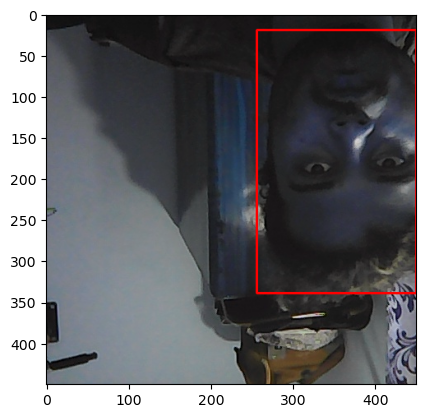

In [52]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [57]:
for partition in ['train','test','validate']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

In [58]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [59]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [61]:
val_images = tf.data.Dataset.list_files('aug_data\\validate\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [62]:
train_images.as_numpy_iterator().next()


array([[[0.1338848 , 0.1338848 , 0.14172794],
        [0.13204657, 0.12420343, 0.128125  ],
        [0.17254902, 0.17254902, 0.17254902],
        ...,
        [0.11715686, 0.10931373, 0.12107843],
        [0.11127451, 0.10343137, 0.11519608],
        [0.11856618, 0.11072304, 0.12248775]],

       [[0.13057598, 0.13057598, 0.13841912],
        [0.13682598, 0.12898284, 0.13290441],
        [0.16366422, 0.16366422, 0.16366422],
        ...,
        [0.11715686, 0.10931373, 0.12107843],
        [0.11372549, 0.10588235, 0.11764706],
        [0.11341912, 0.10557598, 0.11734068]],

       [[0.13725491, 0.13725491, 0.14509805],
        [0.13780637, 0.12996323, 0.1338848 ],
        [0.1598652 , 0.1598652 , 0.1598652 ],
        ...,
        [0.11329657, 0.10545343, 0.11721814],
        [0.11764706, 0.10980392, 0.12156863],
        [0.11096814, 0.10802696, 0.11243872]],

       ...,

       [[0.9091299 , 0.9336397 , 0.9571691 ],
        [0.47395834, 0.4768995 , 0.49693626],
        [0.4283701 , 0

In [63]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [64]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [65]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [66]:
val_labels = tf.data.Dataset.list_files('aug_data\\validate\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [67]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.05148, 0.1062 , 0.5674 , 0.816  ], dtype=float16))

In [68]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(1260, 1260, 300, 300, 240, 240)

In [69]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [70]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [71]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [72]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.     , 0.11804, 0.3738 , 0.707  ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.171  , 0.2489 , 0.565  , 0.807  ],
        [0.     , 0.0733 , 0.3252 , 0.7476 ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.     , 0.1741 , 0.2764 , 0.811  ],
        [0.0816 , 0.2222 , 0.567  , 0.8643 ],
        [0.536  , 0.1321 , 1.     , 0.7812 ]], dtype=float16))

In [73]:
data_samples = train.as_numpy_iterator()


In [77]:
res = data_samples.next()


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'


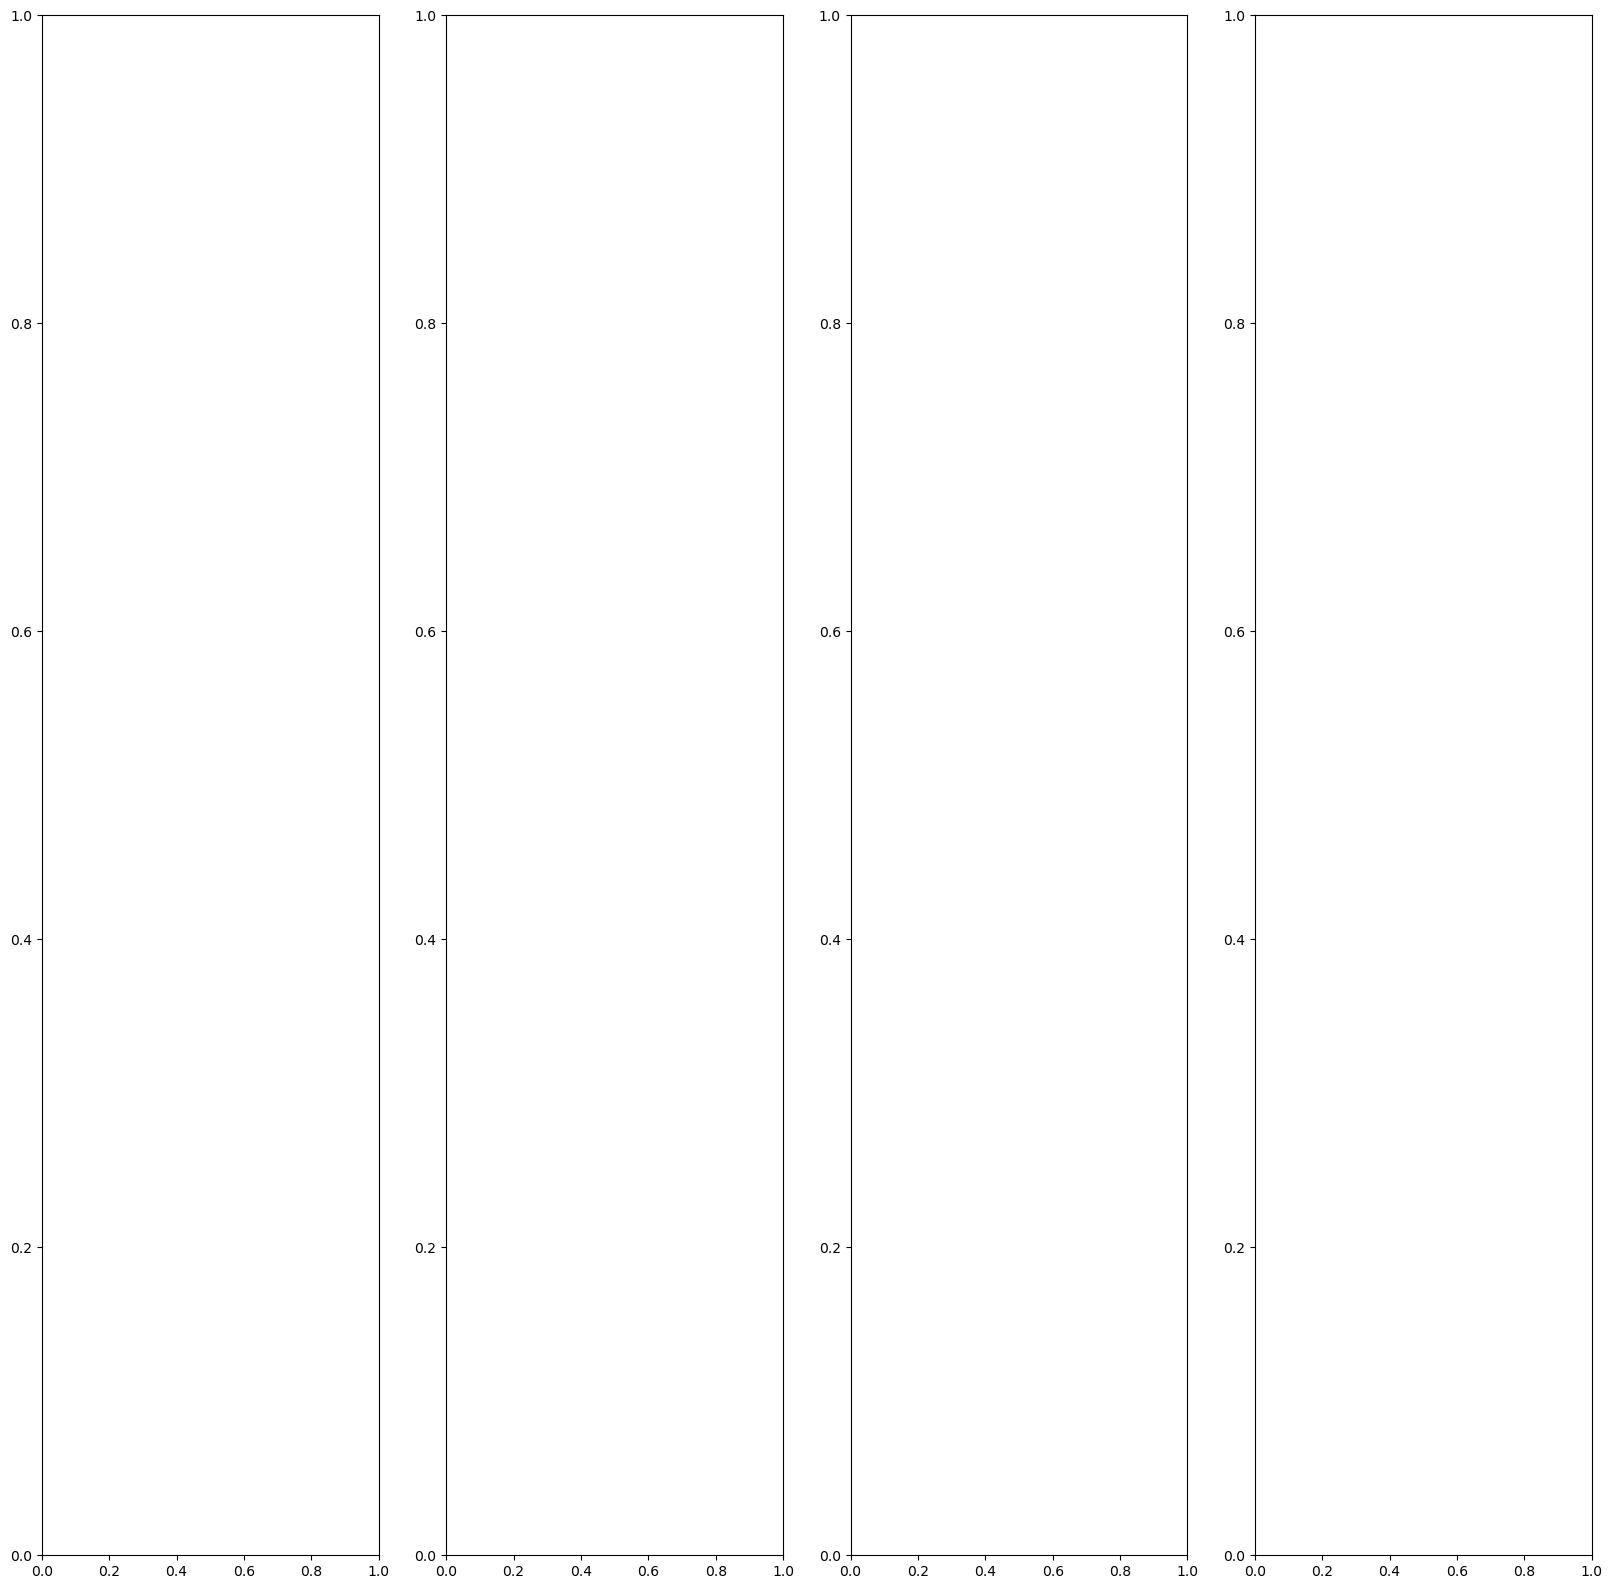

In [78]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [79]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [80]:
vgg = VGG16(include_top=False)




58889256/58889256 [==============================] - 17s 0us/step


In [81]:
vgg.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [82]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [83]:
facetracker = build_model()


In [84]:
facetracker.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [85]:
X, y = train.as_numpy_iterator().next()


In [91]:
X

array([[[[0.7483456 , 0.7294118 , 0.66207105],
         [0.74509805, 0.72156864, 0.6594363 ],
         [0.7490196 , 0.7254902 , 0.67058825],
         ...,
         [0.99552697, 1.        , 1.        ],
         [0.9730392 , 0.98106617, 0.96164215],
         [0.77818626, 0.77463233, 0.80949754]],

        [[0.7534314 , 0.72990197, 0.66813725],
         [0.7500613 , 0.7264706 , 0.67058825],
         [0.7504289 , 0.7264093 , 0.6636642 ],
         ...,
         [0.8879289 , 0.8978554 , 0.91789216],
         [0.752451  , 0.75330883, 0.74699754],
         [0.7253064 , 0.71844363, 0.74099267]],

        [[0.7529412 , 0.7294118 , 0.6745098 ],
         [0.75300246, 0.72898287, 0.6731005 ],
         [0.75735295, 0.72990197, 0.6671569 ],
         ...,
         [0.76329654, 0.7212623 , 0.75306374],
         [0.95159316, 0.94460785, 0.9550858 ],
         [0.99460787, 0.9957108 , 0.99693626]],

        ...,

        [[0.15030637, 0.15030637, 0.15814951],
         [0.15692402, 0.15692402, 0.15692402]

In [92]:
classes, coords = facetracker.predict(X)


1/1 [==============================] - 1s 1s/step


In [93]:
classes, coords


(array([[0.63246006],
        [0.5798194 ],
        [0.62076074],
        [0.59702367],
        [0.59146595],
        [0.57715714],
        [0.64133435],
        [0.6429725 ]], dtype=float32),
 array([[0.6118315 , 0.39172068, 0.42965302, 0.6560688 ],
        [0.598019  , 0.4204542 , 0.41082117, 0.742528  ],
        [0.6061512 , 0.47785467, 0.43292448, 0.69301474],
        [0.69491327, 0.41151556, 0.47790042, 0.76438737],
        [0.6413405 , 0.37657034, 0.38473234, 0.68918335],
        [0.6653115 , 0.4833064 , 0.456135  , 0.6756338 ],
        [0.6913526 , 0.37160647, 0.46996996, 0.61219513],
        [0.74859285, 0.40346637, 0.38588774, 0.6796298 ]], dtype=float32))

In [94]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [95]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)


ValueError: decay is deprecated in the new Keras optimizer, please check the docstring for valid arguments, or use the legacy optimizer, e.g., tf.keras.optimizers.legacy.Adam.

In [96]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)


In [97]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [98]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [99]:
localization_loss(y[1], coords)


<tf.Tensor: shape=(), dtype=float32, numpy=6.7091236>

In [100]:
classloss(y[0], classes)


<tf.Tensor: shape=(), dtype=float32, numpy=0.6350473>

In [101]:
regressloss(y[1], coords)


<tf.Tensor: shape=(), dtype=float32, numpy=6.7091236>

In [103]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [104]:
model = FaceTracker(facetracker)


In [105]:
model.compile(opt, classloss, regressloss)


In [106]:
logdir='logs'


In [107]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [108]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/10
158/158 [==============================] - 828s 5s/step - total_loss: 0.8498 - class_loss: 0.2118 - regress_loss: 0.7439 - val_total_loss: 2.4223 - val_class_loss: 1.8190 - val_regress_loss: 1.5128
Epoch 2/10
158/158 [==============================] - 685s 4s/step - total_loss: 0.1781 - class_loss: 0.0454 - regress_loss: 0.1554 - val_total_loss: 0.0907 - val_class_loss: 8.2060e-04 - val_regress_loss: 0.0902
Epoch 3/10
158/158 [==============================] - 749s 5s/step - total_loss: 0.1348 - class_loss: 0.0329 - regress_loss: 0.1184 - val_total_loss: 3.2977 - val_class_loss: 1.6278 - val_regress_loss: 2.4837
Epoch 4/10
158/158 [==============================] - 688s 4s/step - total_loss: 0.0733 - class_loss: 0.0204 - regress_loss: 0.0631 - val_total_loss: 2.2363 - val_class_loss: 1.0834 - val_regress_loss: 1.6946
Epoch 5/10
158/158 [==============================] - 639s 4s/step - total_loss: 0.0752 - class_loss: 0.0190 - regress_loss: 0.0657 - val_total_loss: 2.1464 - v

In [109]:
hist.history


{'total_loss': [0.056071486324071884,
  0.026160327717661858,
  0.03431011736392975,
  0.010066710412502289,
  0.006203428842127323,
  0.005135092418640852,
  0.0023646492045372725,
  0.0031406914349645376,
  0.001297259470447898,
  0.0036349776200950146],
 'class_loss': [0.008594946935772896,
  0.00024584506172686815,
  0.002781408140435815,
  0.0018522781319916248,
  0.00033626542426645756,
  2.586883056210354e-05,
  0.00041451913421042264,
  2.256096195196733e-05,
  1.673442602623254e-05,
  0.002317948266863823],
 'regress_loss': [0.05177401378750801,
  0.02603740431368351,
  0.03291941434144974,
  0.00914057157933712,
  0.006035296246409416,
  0.005122158210724592,
  0.0021573896519839764,
  0.0031294110231101513,
  0.0012888922356069088,
  0.002476003486663103],
 'val_total_loss': [2.4223275184631348,
  0.09065195918083191,
  3.2976574897766113,
  2.236330509185791,
  2.146392583847046,
  0.9288965463638306,
  0.9639291167259216,
  0.8365947008132935,
  0.9284321069717407,
  5.150

<function matplotlib.pyplot.show(close=None, block=None)>

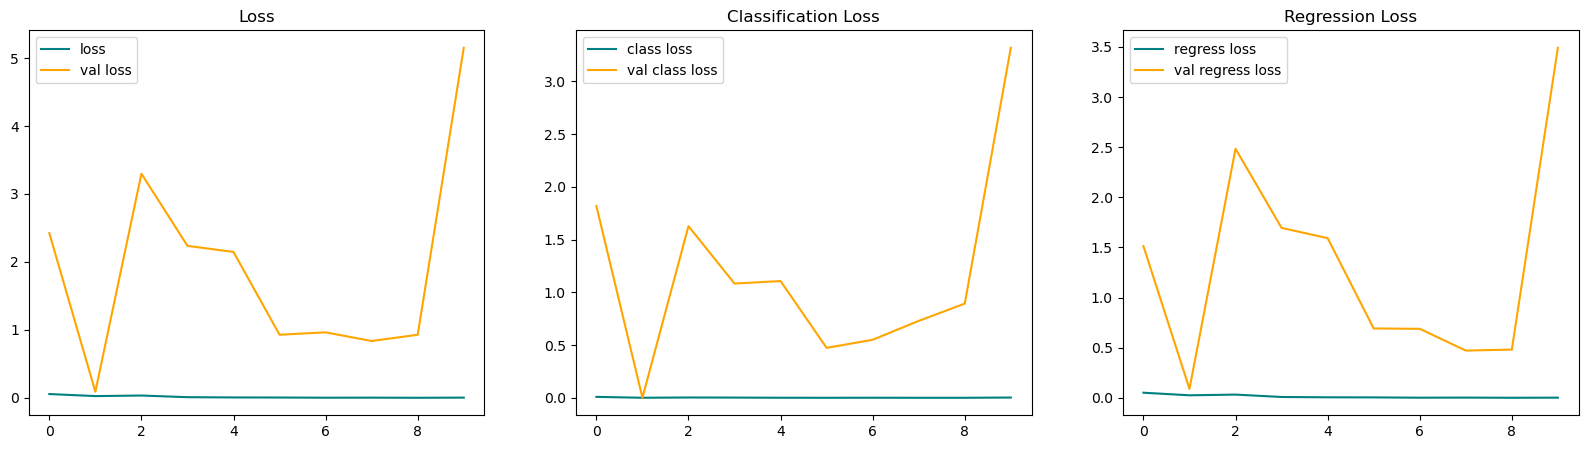

In [110]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show

In [117]:
test_data = test.as_numpy_iterator()


In [118]:
test_sample = test_data.next()


In [119]:
yhat = facetracker.predict(test_sample[0])


1/1 [==============================] - 1s 999ms/step


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'


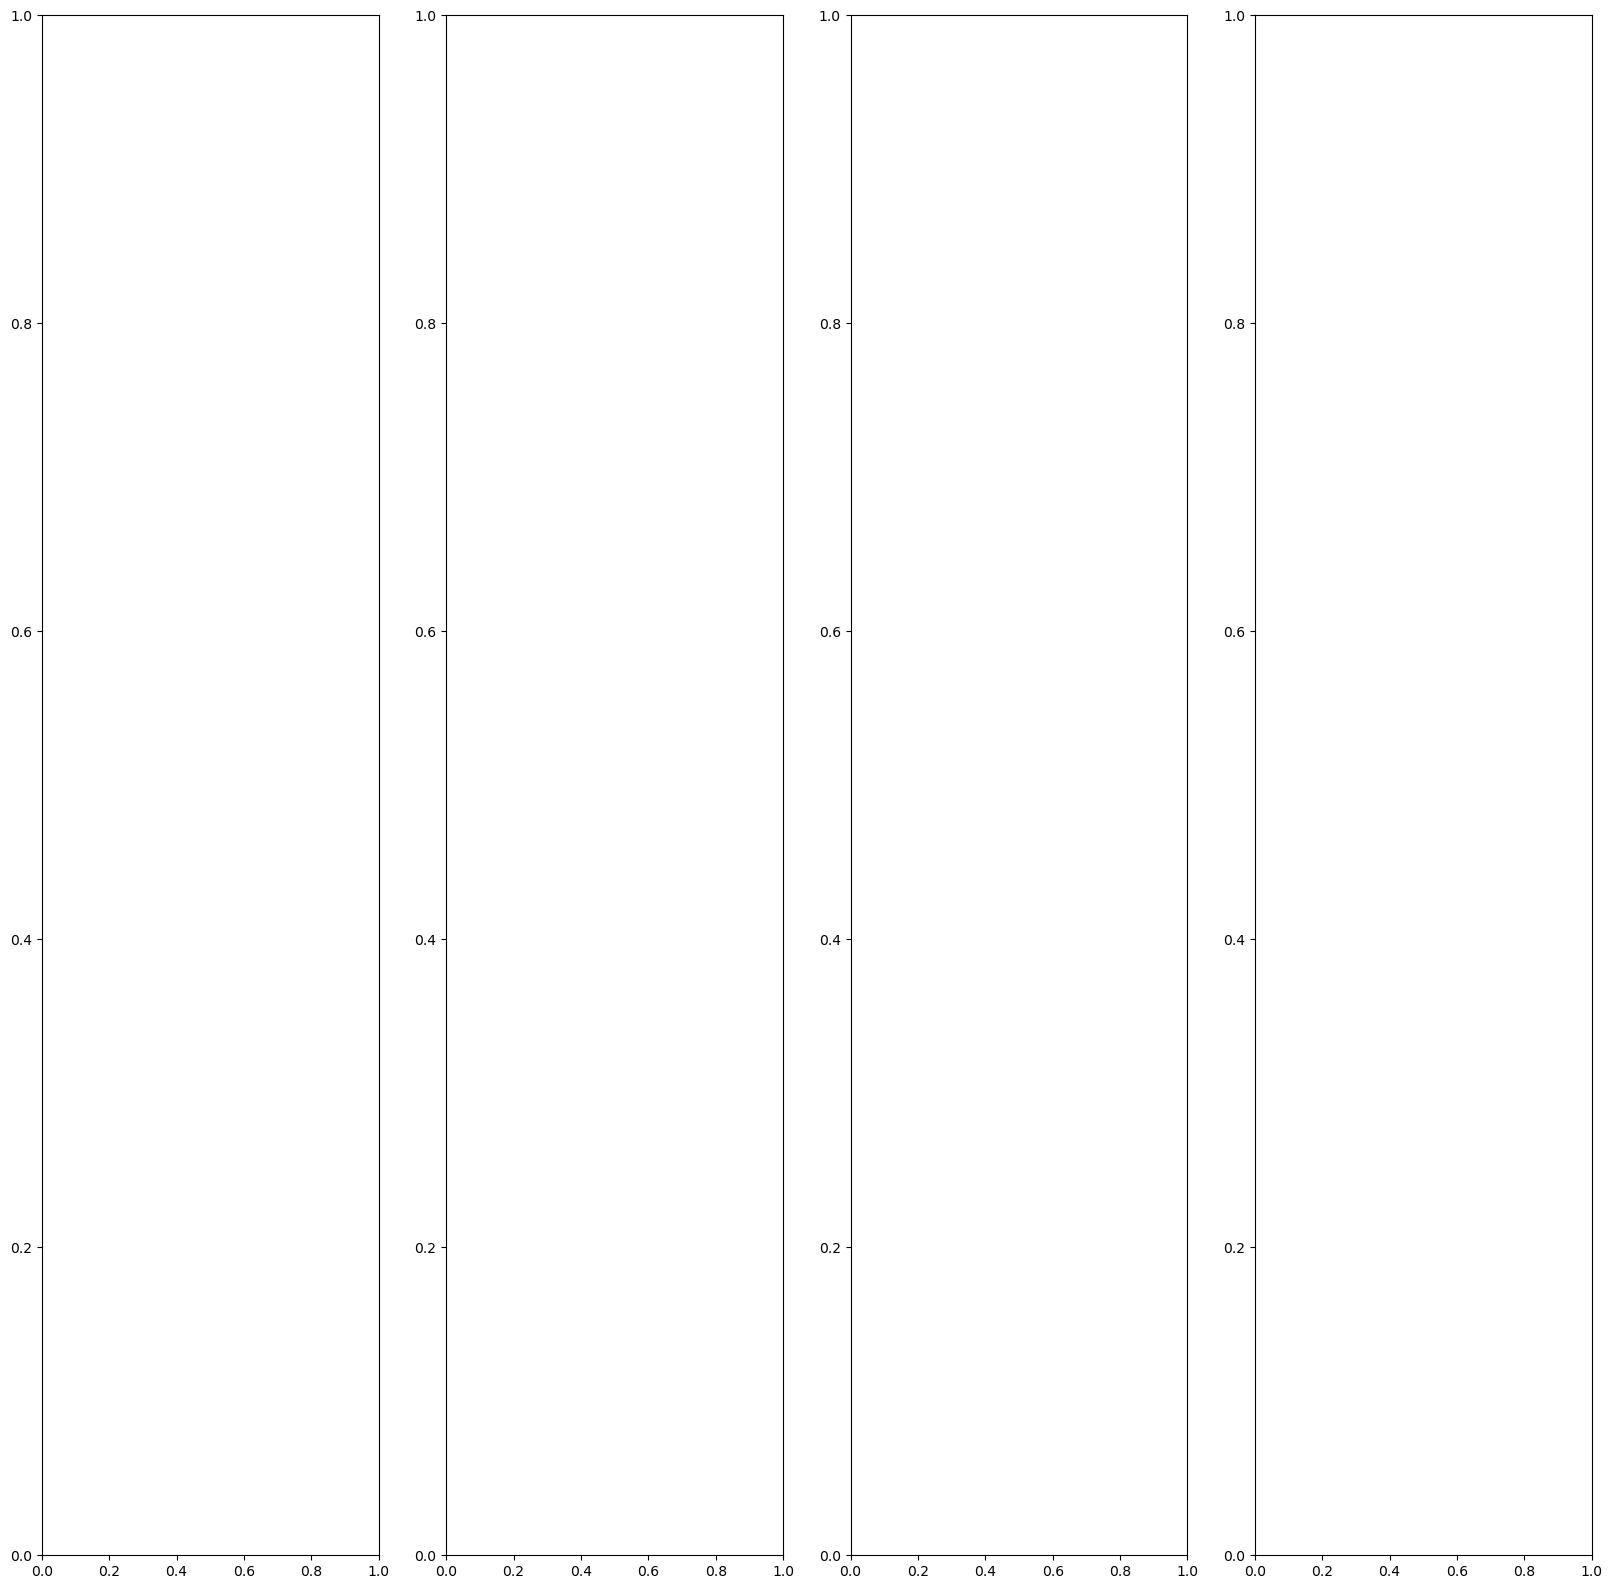

In [120]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)
    

In [127]:
from tensorflow.keras.models import load_model


In [128]:
facetracker.save('facetracker.h5')


In [129]:
facetracker = load_model('facetracker.h5')


In [133]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 213ms/step
